# Ejercicio: Churn


Este ejercicio tiene por objetivo poner en práctica los conceptos las técnicas de aprendizaje supervisado y en particular clasificación. El ejercicio se divide en las siguientes secciones:
1. exploración de los datos mediante técnicas estadísticas clásicas,
2. selección de atributos,
3. entrenamiento de diferentes clasificadores,
4. evaluación.

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

# Librerías:
Importamos todas las librerías que serán utilizadas para el ejercicio.




In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -U --no-cache-dir gdown --pre

# Datos:
Descargamos los datos desde google drive a la instancia de google colab.

In [2]:
#!gdown --id 1OkojZM7dmynsC9rTZNpg7nnpQkYGvHlQbkJO7DB3asA
# !gdown --id 1_kZWTS1shXWq3HHH1mebYcebwRD6_F_o

/opt/anaconda3/lib/python3.12/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_kZWTS1shXWq3HHH1mebYcebwRD6_F_o
To: /Users/carmenlozanolopez/Library/CloudStorage/OneDrive-UniversidadLoyolaAndalucía/AS/tarea1/Bank Customer Churn Prediction.csv
100%|████████████████████████████████████████| 562k/562k [00:00<00:00, 2.24MB/s]


In [2]:
# Ref.: https://www.kaggle.com/isaikumar/creditcardfraud/version/1
# Data frame with credit card data

# Leemos el archivo CSV
df = pd.read_csv( 'Bank Customer Churn Prediction.csv' )

# Trabajo

## 1. Entendimiento del problemas y los datos.


### 1.1 El problema
El problema de Churn se refiere a los clientes que abandonaron el banco. Habrá que predecir si un cliente dejará de usar los servicios del banco o no. Podemos tratar de resolver este problema con algoritmos de clasificación.  Se tendrá que crear un modelo que sea capaz de predecir si el cliente abandona el banco basándose en las características de los clientes
Las métricas de performance tendrán en cuenta el desequilibrio de clases y la capacidad que el modelo tiene para predecir correctamente cada una de las instancias. Las que hemos elegido en este caso han sido:
-	Precisión: mide la exactitud de las predicciones positivas (qué clientes de los que predecimos, realmente abandonan el banco).
-	Recall: mide la capacidad para identificar correctamente los clientes que terminaron por abandonar el banco (tasa de verdaderos positivos).
-	F1-score: hace una especia de media combinando precisión y recall
-	Matriz de confusión: nos ayuda a visualizar el desarrollo del modelo, mostrando todos los valores: VP, FP, VN y FN.


### 1.2 Los datos
*Haga un análisis de los atributos y los datos. En el caso de los atributos observe el tipo de dato, distribuciones, etc. Analice la distribución de los datos en función de la clase objetivo (churn). Calidad de datos (datos faltantes, outliers).*

### Código de referencia

1.   Visualizamos la información del dataframe de datos.
2.   Calculamos la correlación entre cada una de las variables y la clase. Cuanto más grande el valor de correlación en valor absoluto mayor es la correlación estadística entre la variable y la clase Class que contiene si la transacción es fraudulenta o legítima.


In [3]:
# 1
# Details on data
print(df.shape)
print(df.columns)
print(df.dtypes)

# Change categorical features to numerical
df['country'] = df['country'].apply(lambda x : 0.0 if x == 'France' else 1.0 if x == 'Germany' else 2.0)
df['gender'] = df['gender'].apply(lambda x : 0.0 if x == 'Male' else 1.0)

# 2
# Compute correlation of features with respect to Class
# By default uses Pearson correlation that estimates linear correlation:
# +1 or -1 linearly correlated, 0 non linear correlated
df.corr()["churn"].sort_values(key=abs,ascending=False)

(10000, 12)
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


churn               1.000000
age                 0.285323
active_member      -0.156128
balance             0.118533
gender              0.106512
products_number    -0.047820
country             0.035943
credit_score       -0.027094
tenure             -0.014001
estimated_salary    0.012097
credit_card        -0.007138
customer_id        -0.006248
Name: churn, dtype: float64

Como podemos observar las variables apenas muestran correlación con el target, siendo la edad la más correlacionada. 

Observamos que no hay datos faltantes:

In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

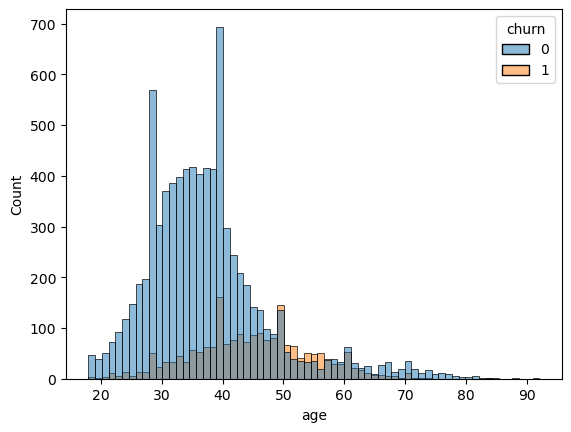

In [ ]:
import seaborn as sns

# Histogram of feature depending on churn
sns.histplot(data=df, x="age", hue="churn")

<Axes: xlabel='active_member', ylabel='Count'>

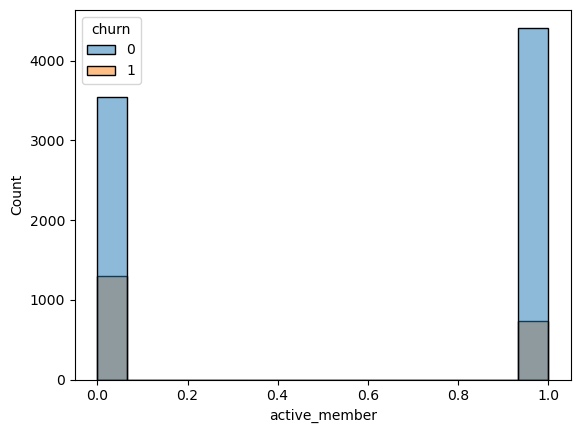

In [ ]:
#miembro activo
sns.histplot(data=df, x="active_member", hue="churn")

<Axes: xlabel='balance', ylabel='Count'>

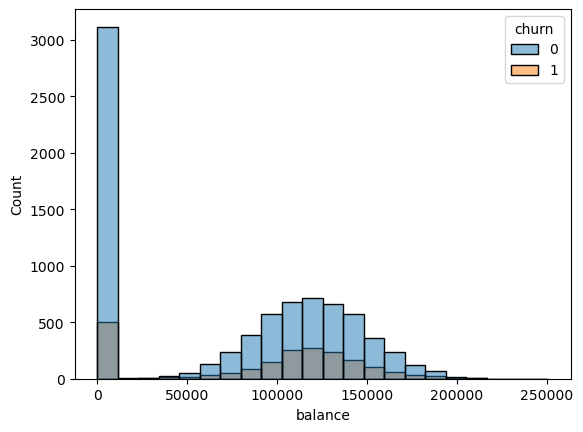

In [ ]:
sns.histplot(data=df, x="balance", hue="churn")

<Axes: xlabel='gender', ylabel='Count'>

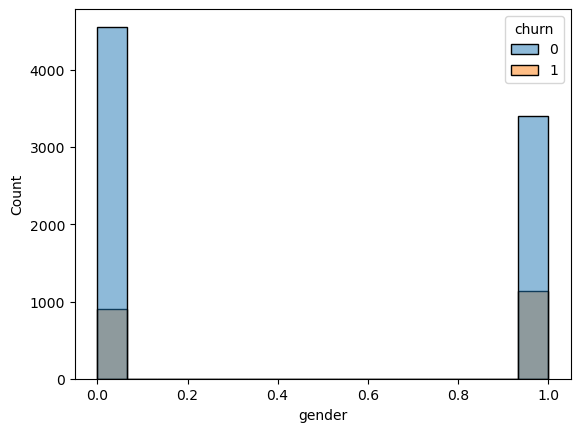

In [ ]:
sns.histplot(data=df, x="gender", hue="churn")

<Axes: xlabel='products_number', ylabel='Count'>

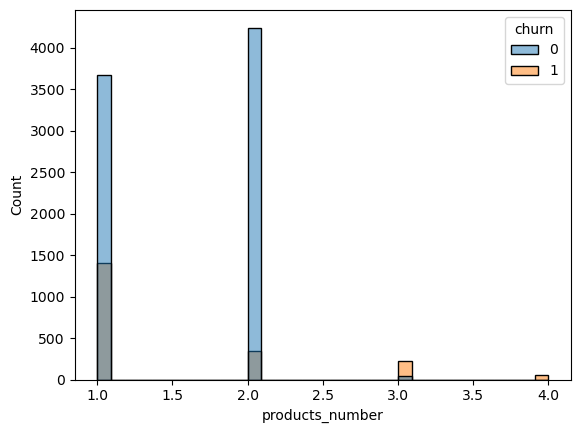

In [ ]:
sns.histplot(data=df, x="products_number", hue="churn")

<Axes: xlabel='country', ylabel='Count'>

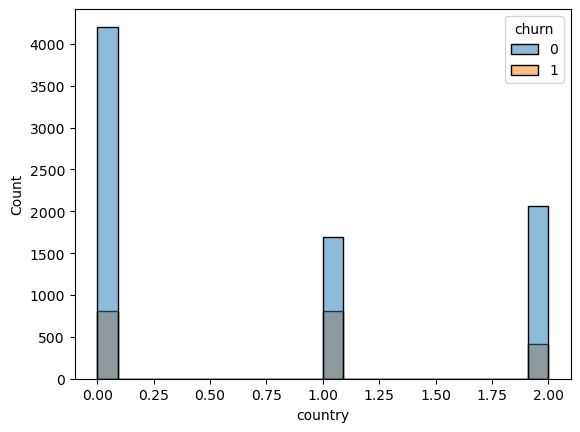

In [ ]:
sns.histplot(data=df, x="country", hue="churn")

<Axes: xlabel='credit_score', ylabel='Count'>

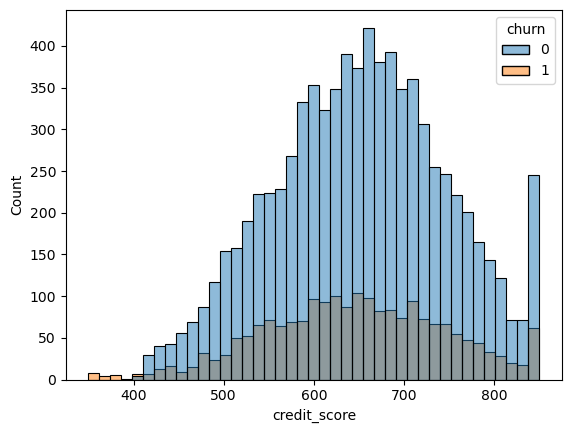

In [ ]:
sns.histplot(data=df, x="credit_score", hue="churn")

<Axes: xlabel='tenure', ylabel='Count'>

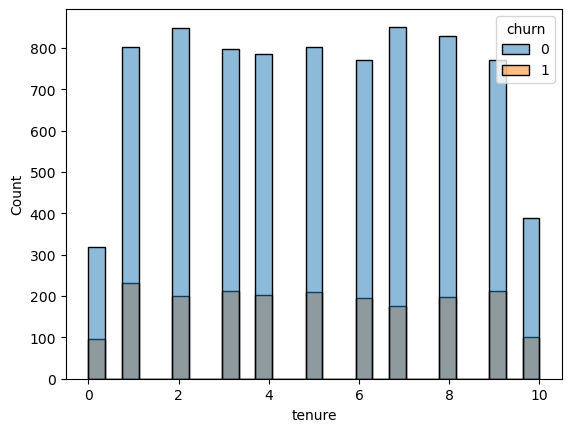

In [ ]:
sns.histplot(data=df, x="tenure", hue="churn")

<Axes: xlabel='estimated_salary', ylabel='Count'>

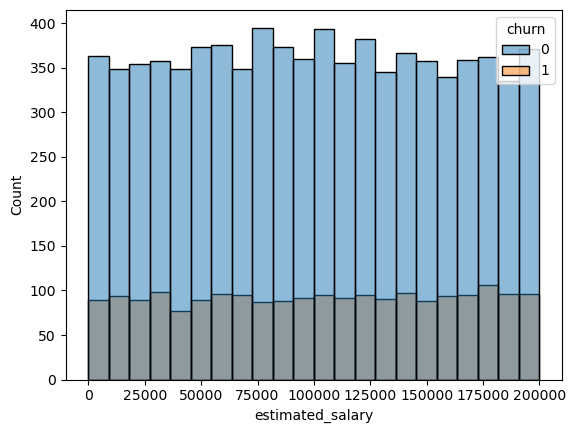

In [ ]:
sns.histplot(data=df, x="estimated_salary", hue="churn")

<Axes: xlabel='credit_card', ylabel='Count'>

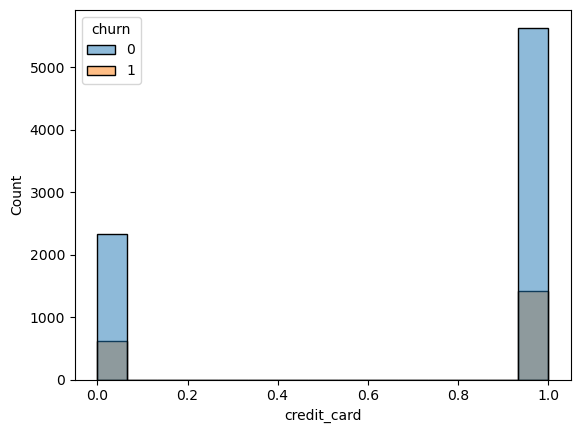

In [ ]:
sns.histplot(data=df, x="credit_card", hue="churn")

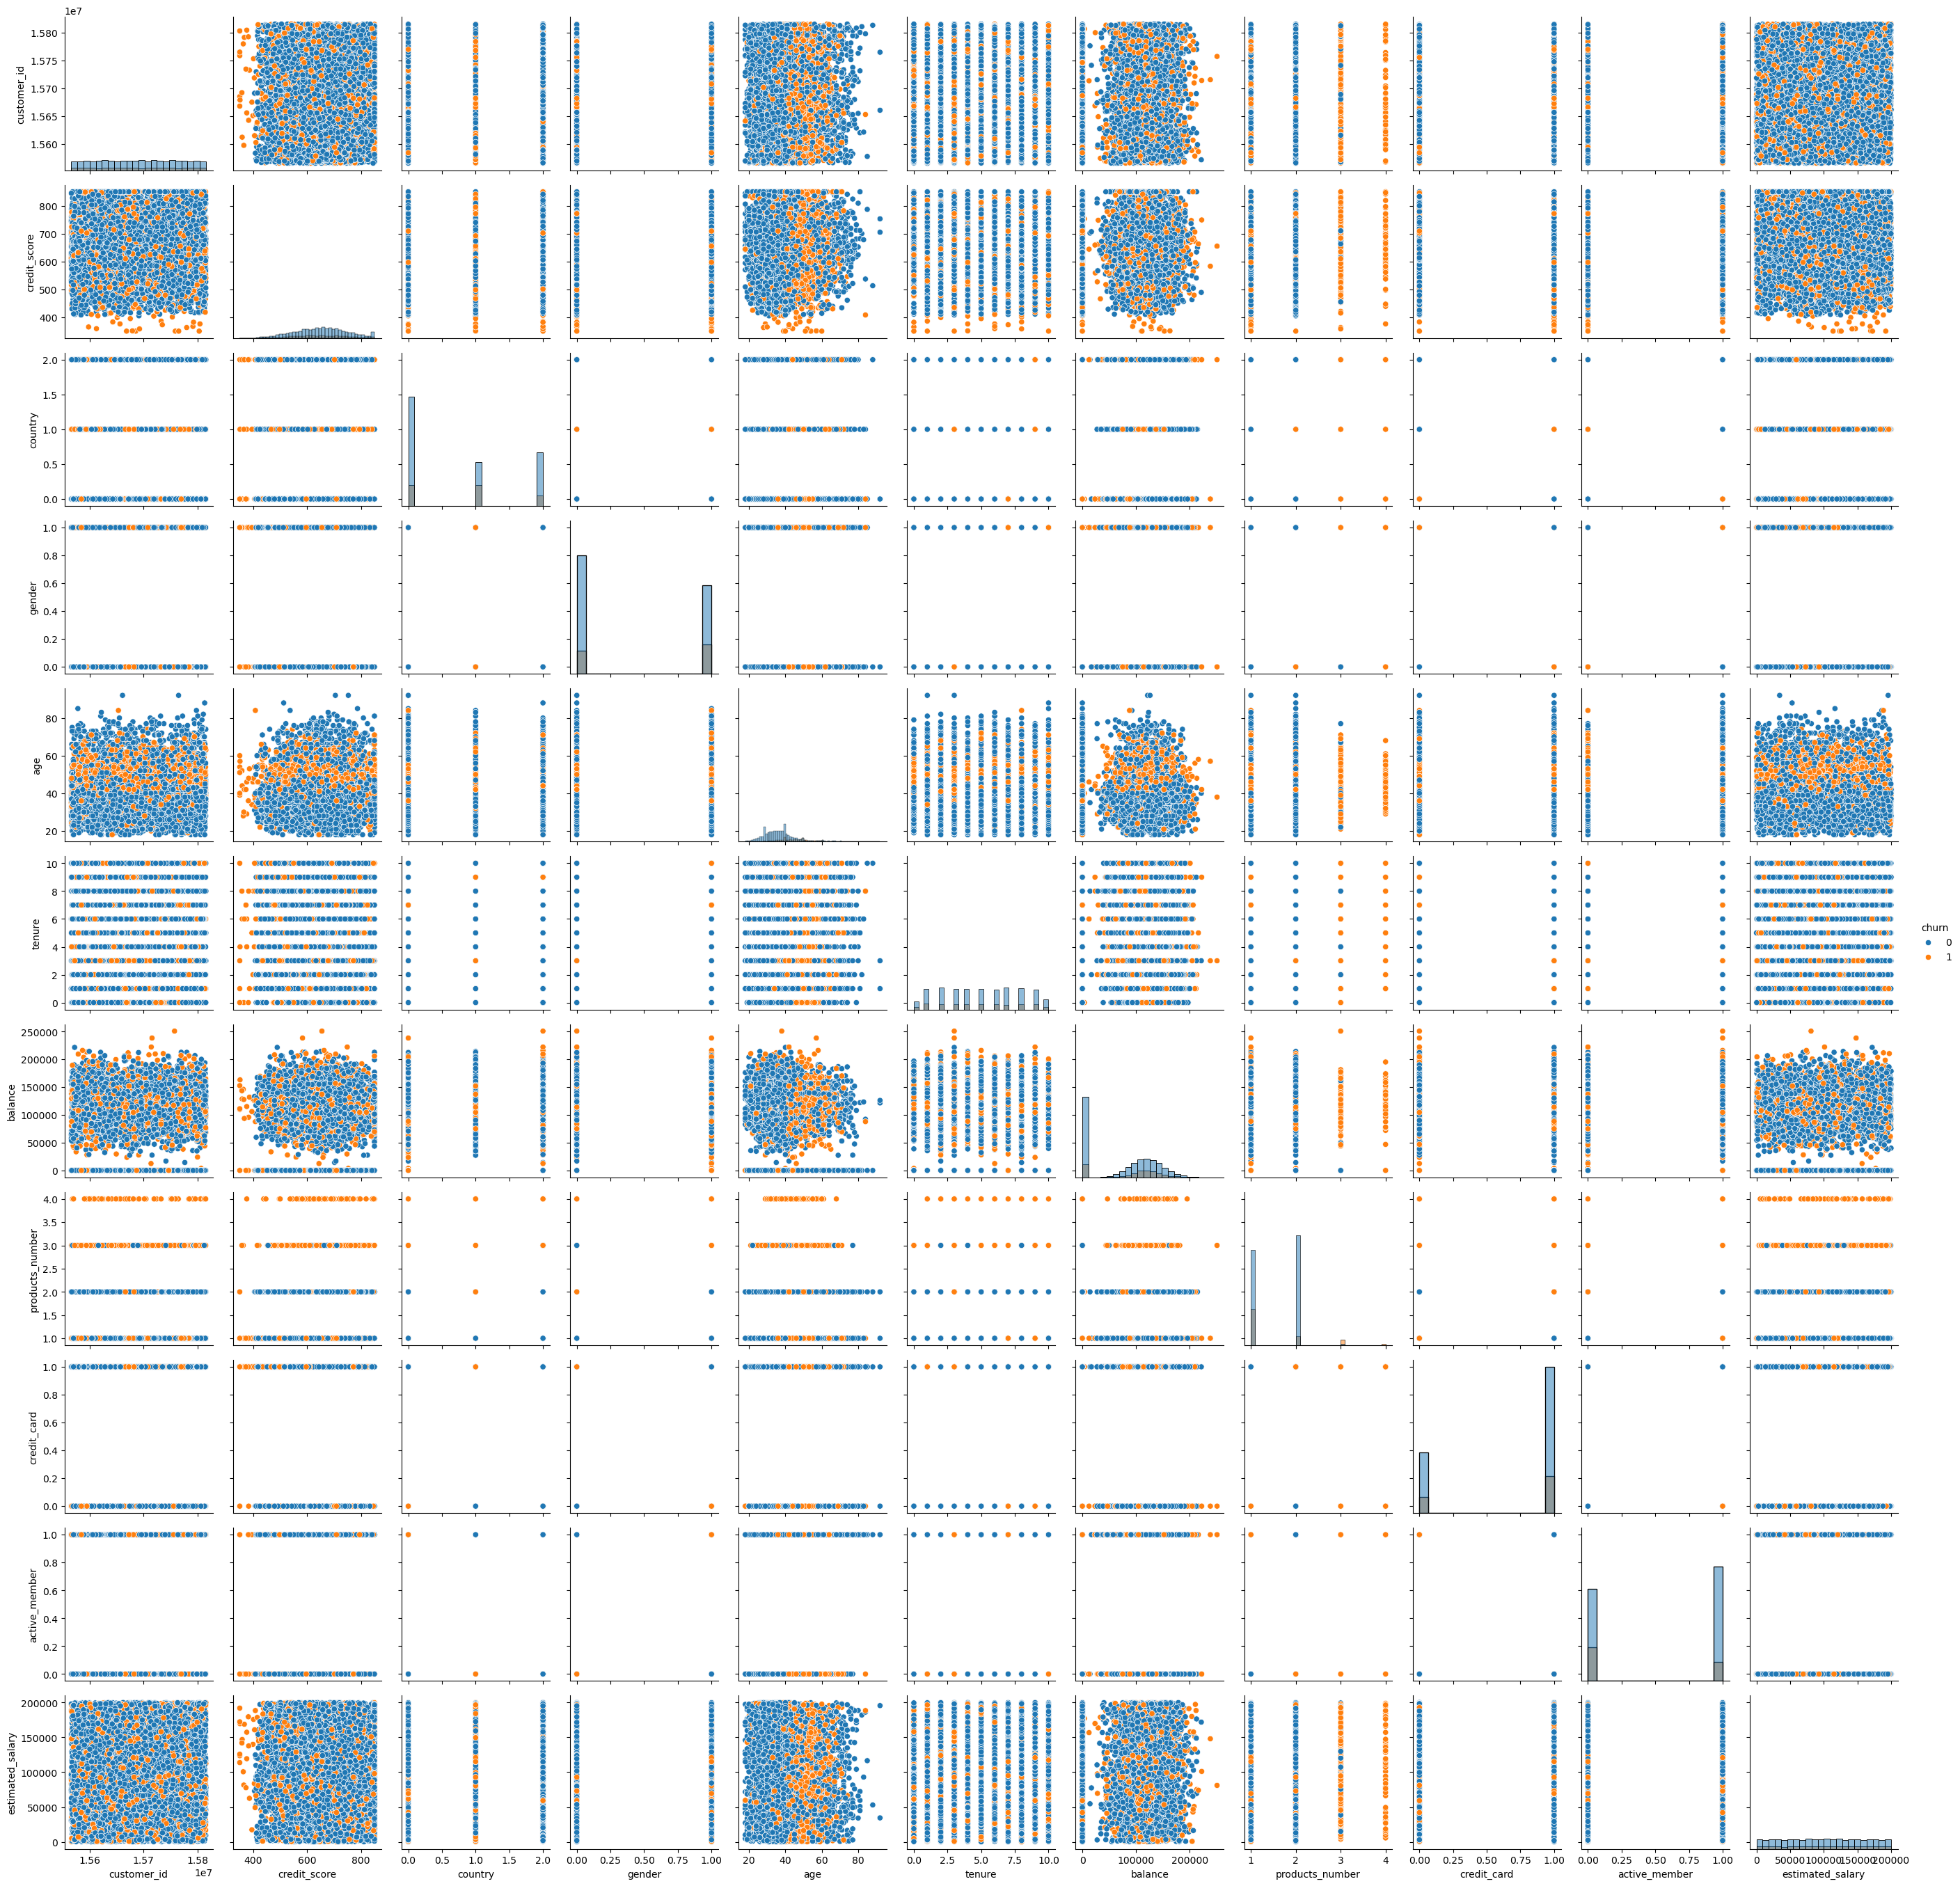

In [ ]:
g=sns.PairGrid(df, hue="churn")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()


En el gráfico superior, observamos en la diagonal los histogramas de cada variable y, fuera de ella, los gráficos de dispersión entre cada par de variables. A partir de este análisis, destacamos las siguientes observaciones sobre algunas variables que consideramos clave: 
* Edad: Identificamos una franja de edad donde se observa una tendencia diferenciada entre quienes abandonan el banco y quienes permanecen. En el histograma de esta variable, notamos que su distribución se asemeja a una gaussiana.
* credit_score: Aunque presenta una distribución similar a la normal, esta variable, por sí sola, no permite distinguir de forma efectiva entre ambas clases. Sin embargo, en combinación con otras características, podría aportar valor.
* balance: Esta variable muestra cierta similitud con una distribución gaussiana. Al igual que el credit_score, no es útil para clasificaciones de manera independiente, pero podría ser relevante al combinarla con otras variables.
* estimated_salary: Aunque tiene una distribución uniforme que, a primera vista, no permite diferenciar entre quienes se quedan y quienes se van, su interacción con otras variables, como la edad, podría ser útil para construir un modelo de clasificación más robusto.

In [ ]:
df.describe().loc[['mean', 'min', 'max']]

customer_id  credit_score  country  gender      age   tenure  \
mean  1.569094e+07      650.5288   0.7463  0.4543  38.9218   5.0128   
min   1.556570e+07      350.0000   0.0000  0.0000  18.0000   0.0000   
max   1.581569e+07      850.0000   2.0000  1.0000  92.0000  10.0000   

            balance  products_number  credit_card  active_member  \
mean   76485.889288           1.5302       0.7055         0.5151   
min        0.000000           1.0000       0.0000         0.0000   
max   250898.090000           4.0000       1.0000         1.0000   

      estimated_salary   churn  
mean     100090.239881  0.2037  
min          11.580000  0.0000  
max      199992.480000  1.0000

Como podemos observar cada variable se mueve en un rango de valores distinto, esto puede afectar en el modelo por lo que más adelante emplearemos alguna estrategia para normalizar/estandarizar los datos.

### 2. Modelado


#### 2.1 Selección de atributos
Seleccionamos los atributos (características) a ser utilizadas. Dentro de los atributos $X$ no debe estar la clase $Churn$. *Comente la estrategia a serguir para seleccionar los atributos*.



In [4]:
# 1
# Extract features and labels

#
# Obs. Modify the following code to select set of features
#
# The following line allows to select some variables to be used

# Remove columns from dataframe
df_X = df.drop(columns=['customer_id', 'churn'])
X = df_X.values

# Churn is the target to predict (classify)
y = df.churn

# 2
# Number of samples per class
unique, counts = np.unique(y, return_counts=True)
for i in range(0,len(unique)):
  print('Class %i: Samples %i' % (unique[i], counts[i]) )

# Number of attributes
print('Number of attributes: %i' % (X.shape)[1])

Class 0: Samples 7963
Class 1: Samples 2037
Number of attributes: 10


Estamos ante un conjunto de datos desbalanceado ya que tenemos más del triple de datos de una clase que de otra.

Dividimos el conjunto de datos de manera que los subconjuntos de entrenamiento y prueba que tienen las mismas proporciones de etiquetas de clase. 

Vamos a emplear el 80% de los datos para entrenar y el 20% para testear.

In [5]:
#train_test_split
from sklearn.model_selection import train_test_split
#establecemos semilla para reproducibilidad
np.random.seed(0)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

Para confirmar que las características que comentamos anteriormente son las realmente relevantes vamos a usar RFE, que no es más que un simple proceso recursivo que ordena las variables de acuerdo a una medida de la importancia de cada variable dada por un clasificador, en este caso empleamos RandomForestClassifier con 10 estimadores y le indicamos que queremos 5 variables.

In [6]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe=RFE(estimator=RandomForestClassifier(n_estimators=10),n_features_to_select=5,step=1)

rfe.fit(x_train,y_train)

print(rfe.get_feature_names_out())

['x0' 'x3' 'x5' 'x6' 'x9']


Efectivamente, nos devuelve las caracteristicas que nosotras habíamos elegido inicialmente e incorpora a mayores product_number.

In [7]:
#Nos quedamos con las caracteristicas seleccionadas
X_train_selected=x_train[:,rfe.support_]
X_test_selected=x_test[:,rfe.support_]

Normalizamos los datos con standard scaler ya que se encuentran en distintas escalas y esto puede afectar dando más importancia a ciertas variables que a otras.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_selected)
x_train_scal = scaler.transform(X_train_selected)
x_test_scal = scaler.transform(X_test_selected)


#### 2.1 Entrenamiento del clasificador

1. El conjunto de datos se separa en entrenamiento y test.
2. Se selecciona y entrena un clasificador.
3. Métricas de performance



##### GaussianNB 
Se trata de una variante del clasificador Naive Bayes, que se utiliza con distribuciones gaussianas, es decir, distribuciones normales y variables continuas. Este modelo se ajusta hallando la media y la desviación típica de cada clase. 

Veremos a continuación, que este modelo no va a funcionar bien debido a que como comentamos anteriormente las variables no siguen una gaussiana.


In [10]:
# Classifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


clf = GaussianNB()
# Train classifier
clf.fit(x_train_scal,y_train)

GaussianNB()

In [17]:
# 3
# Confusion matrix
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1527   66]
 [ 334   73]]

 % Corr ----------------------------
80.0

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8205265986029017, 'recall': 0.9585687382297552, 'f1-score': 0.8841922408801389, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5251798561151079, 'recall': 0.17936117936117937, 'f1-score': 0.2673992673992674, 'support': 407.0}: 


Aunque el modelo tiene una precisión global razonable (80%), el desempeño para la Clase Churn es bastante pobre, como se observa en las métricas específicas.

Si nos fijamos solo en la clase 0 podemos pensar que es un buen clasificador pero lo cierto es que está clasificándolo casi todo como perteneciente a esta clase no churn, ofreciendonos buen rendimiento en la deteccion de la misma y un desempeño pobre en nuestro objetivo principal, la deteccion de fraude.

Como podemos observar el 82% de las predicciones de la clase no churn son correctas e identificamos un 95% de los casos de estos casos.
Por otro lado, de la clase churn solo el 52% de las predicciones hechas son correctas y de los 407 casos de churn tan solo identificamos 73, identificando tan solo un 17% del churn.

Si nos fijamos en la métrica del F1-Score para Clase churn es bajo (26%), lo que confirma un bajo desempeño del modelo en la predicción de esta clase.

Viendo que el clasificador no nos ofrece buenos resultados, podemos tratar de establecer un umbral de manera que los que esten por encima de cierto umbral son propensos a irse de la empresa y si están por debajo no hay riesgo.

(2000, 2)


369

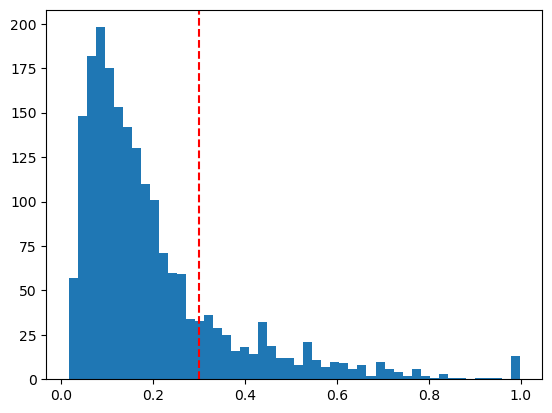

In [18]:
prob = clf.predict_proba(x_test_scal)
print(prob.shape)

plt.hist(prob[:,1], bins=50, cumulative=False)
plt.axvline(x=0.3, color='r', linestyle='--')

# Number of customers with prob of churn more thatn 0.3
sum(prob[:,1]>0.3)

Podemos establecer un umbral en 0.3, que nos ayudará a identificar a 369 clientes que potencialmente querrian irse de la empresa.

##### Random Forest

A continuación, vamos a tratar de resolver el problema con el algoritmo de Random Forest que es un algoritmo de ensemble.

Vamos a tratar de encontrar el conjunto de hiperparámetros óptimo aplicando validación cruzada de 5 folds.

###### **Random Forest clásico**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [30, 40, 50, 50],
          'max_depth': [2,5, 10, 15], 
          'min_samples_split': [2, 5, 10]}

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=5, n_jobs=-1)
# Train classifier
clf.fit(x_train_scal,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 40, 50, 50]})

In [20]:
print('Los mejores parámetros son', clf.best_params_)

Los mejores parámetros son {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 40}


In [21]:
#prediccion
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1513   80]
 [ 252  155]]

 % Corr ----------------------------
83.39999999999999

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8572237960339943, 'recall': 0.9497802887633396, 'f1-score': 0.901131625967838, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6595744680851063, 'recall': 0.3808353808353808, 'f1-score': 0.48286604361370716, 'support': 407.0}: 


Hemos mejorado los resultados anteriores, pero la mayoria de los puntos churn quedan mal clasificados. 
El modelo tiene un desempeño razonablemente bueno en términos generales, aunque no estamos considerando los desequilibrios entre clases ya que tenemos 1593 casos de no churn y 407 de churn.

Como podemos observar el 85% de las predicciones de la clase no churn son correctas e identificamos un 94% de los casos de no churn, mientras que tan solo un 65% de las predicciones hechas para no churn son correctas y de los 407 casos de churn tan solo identificamos 155, identificando tan solo un 38% del churn, lo que indica que el modelo está fallando al detectar muchos de los casos reales de churn. Por esto que no consideramos que sea un buen modelo para la detección de fraude. 
Si nos fijamos en la métrica del F1-Score para Clase churn es bajo (0.483), lo que confirma un bajo desempeño del modelo en la predicción de esta clase.

Existe un desbalance en la cantidad de datos entre las clases, como dijimos la Clase no churn tiene 1593 casos, mientras que Clase churn solo tiene 407. Esto puede estar sesgando al modelo a favorecer la predicción de Clase No Churn, dado que tiene más ejemplos.

Vamos a tratar de encontrar un umbral que nos ayude a diferenciar bien una clase de otra.

(2000, 2)


407

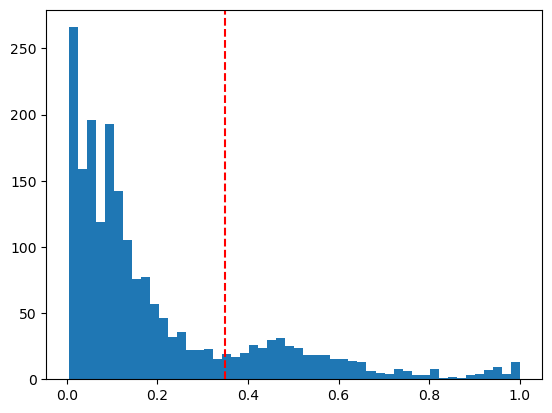

In [24]:
prob = clf.predict_proba(x_test_scal)
print(prob.shape)

plt.hist(prob[:,1], bins=50, cumulative=False)
plt.axvline(x=0.35, color='r', linestyle='--')

# Number of customers with prob of churn more thatn 0.35
sum(prob[:,1]>0.35)

Si establecemos el umbral en 0.35, encontramos 407 clientes que se quieren ir de la empresa.

###### **RandomForest y parámetro class_weight**

Vamos a tratar de mitigar el desbalance de clases, ponderando las muestras en funcion de las proporciones de clases
el efecto de un error en la clase minoritaria pesa más que en la clase mayoritaria.

In [22]:
params = {'n_estimators': [30, 40, 50, 50],
          'max_depth': [2,5, 10, 15], 
          'min_samples_split': [2, 5, 10]}

clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), params, cv=5, n_jobs=-1)
# Train classifier
clf.fit(x_train_scal,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 40, 50, 50]})

In [23]:
print('Los mejores parámetros son', clf.best_params_)

Los mejores parámetros son {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 40}


In [24]:
#prediccion
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1432  161]
 [ 202  205]]

 % Corr ----------------------------
81.85

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8763769889840881, 'recall': 0.898932831136221, 'f1-score': 0.8875116207003408, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5601092896174863, 'recall': 0.5036855036855037, 'f1-score': 0.5304010349288486, 'support': 407.0}: 


El cambio a un modelo con manejo del desbalance de clases ha mejorado significativamente los resultados, especialmente para la Clase Churn, aunque todavía hay margen de mejora.
Aunque la precisión global es ligeramente inferior (81.85% vs. 83% del modelo anterior), el cambio más notable es la mejora en las métricas de la Clase Churn.
* El 87.6% de las predicciones para Clase no churn son correctas, detectando el 89% de los casos de no churn.
* El 56% de las predicciones para Clase Churn son correctas, alcanzando a detectar el 50% de los casos de churn un 12% más respecto al modelo anterior.


###### Reflexión 

Asumiendo que a los considerados como realmente falsos los podemos recuperar (205) y que inicialmente teníamos un 20% de churn en el dataset. 

Dado que 205/(205+161)=0.56, podemos reducir el chunk inicial aprocimadamente a un 10%.


AUC: 0.773


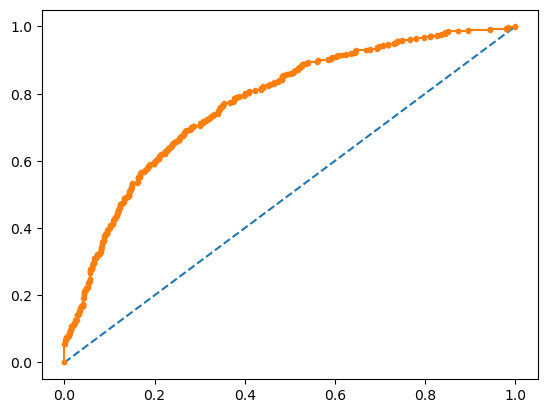

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])

auc = roc_auc_score(y_test, prob[:,1])
print('AUC: %.3f' % auc)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()



En esta ocasión podríamos establecer un umbral en 0.45.

(2000, 2)


405

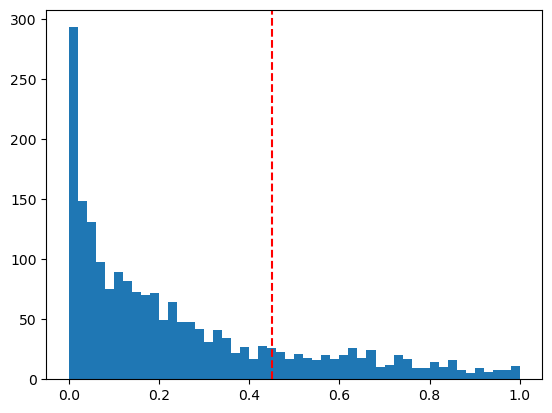

In [ ]:
prob = clf.predict_proba(x_test_scal)
print(prob.shape)

plt.hist(prob[:,1], bins=50, cumulative=False)
plt.axvline(x=0.45, color='r', linestyle='--')

# Number of customers with prob of churn more thatn 0.45
sum(prob[:,1]>0.45)

###### **Prueba RandomForest y subsampling**

Dado que tenemos menos muestras de la clase 1 vamos a tratar de hacer un submuestreo para tener aproximadamente la misma cantidad de muestras de una clase que de otra. 

In [32]:
#make subsampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = rus.fit_resample(x_train_scal, y_train)


params = {'n_estimators': [30, 40, 50, 50],
          'max_depth': [2,5, 10, 15], 
          'min_samples_split': [2, 5, 10]}

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, cv=5, n_jobs=-1)
# Train classifier
clf.fit(X_resampled,y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 40, 50, 50]})

In [33]:
#prediccion
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1256  337]
 [ 132  275]]

 % Corr ----------------------------
76.55

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.9048991354466859, 'recall': 0.7884494664155681, 'f1-score': 0.842670244884267, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.4493464052287582, 'recall': 0.6756756756756757, 'f1-score': 0.5397448478900884, 'support': 407.0}: 


El uso de subsampling ha cambiado significativamente el comportamiento del modelo, priorizando un mayor equilibrio entre las clases al costo de una disminución en la precisión global. 
La precisión global disminuyó respecto a modelos anteriores, pero ha mejorado notablemente en la Clase Churn.
* El 90%% de las predicciones para Clase no churn son correctas, detectando el 78% de los casos de no churn.
* El 44% de las predicciones para Clase Churn son correctas, alcanzando a detectar el 67% de los casos de churn un 17% más respecto al modelo anterior.

Dado que nuestro objetivo principal es detectar el churn, consideramos que este modelo muestra un desempeño aceptable, ya que logra identificar el 67% de los casos de churn (recall). Sin embargo, este enfoque genera un mayor número de falsos positivos (337), lo que significa que algunas personas clasificadas como churn en realidad pertenecen a la clase no churn.

Es necesario evaluar si es más conveniente reducir los falsos positivos, lo que implicaría sacrificar parte del recall y detectar menos casos de churn, o si es preferible optar por un modelo más restrictivo que priorice la identificación de posibles casos de churn, asumiendo el riesgo de clasificar erróneamente a algunos clientes no churn.

(2000, 2)


361

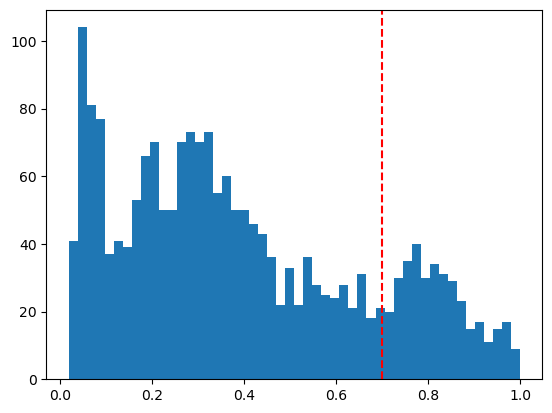

In [41]:
prob = clf.predict_proba(x_test_scal)
print(prob.shape)

plt.hist(prob[:,1], bins=50, cumulative=False)
plt.axvline(x=0.7, color='r', linestyle='--')

# Number of customers with prob of churn more thatn 0.45
sum(prob[:,1]>0.7)

# Clase 7: 

## Comparación xgboost y codigo boosting clase

A continuación vamos a hacer una comparación de emplear xgboost de la libreria de python y el código de xgboost elaborado en clase.

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import log_loss, accuracy_score

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=500, learning_rate=0.1, max_depth=3, verbose=False):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.verbose = verbose
        self.models = []
        self.initial_log_odds = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize with log-odds of the positive class
        p = np.mean(y)
        self.initial_log_odds = np.log(p / (1 - p))
        # Fo: initial predictions
        F = np.full(y.shape, self.initial_log_odds)

        for m in range(self.n_estimators):
            # Compute pseudo-residuals (negative gradients)
            # r_i = y_i - sigma(F(x_i))
            residuals = y - self.sigmoid(F)

            # Fit a regression tree h_m to the residuals r_i (tree = h_m)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            self.models.append(tree)

            # Update the predictions
            # F(x) = Fo + eta * sum_m h_m(x)
            F += self.learning_rate * tree.predict(X)

            if self.verbose:
                loss = log_loss(y, self.sigmoid(F))
                accuracy = accuracy_score(y, (self.sigmoid(F) > 0.5).astype(int) )
                print(f"Iteration {m}, Log Loss: {loss:.4f}, Accuracy: {accuracy: .4f}")

    def predict_proba(self, X):
      # F(x) = Fo + sum_m eta * h_m(x)
      F = np.full(X.shape[0], self.initial_log_odds)  # Start with initial predictions
      for tree in self.models:
        F += self.learning_rate * tree.predict(X)

      # Prob = sigmoid(F(x))
      return self.sigmoid(F)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs > 0.5).astype(int)

In [21]:
gb = MyGradientBoostingClassifier(n_estimators=500, learning_rate=0.5, max_depth=3, verbose=True)
gb.fit(x_train_scal, y_train)

# Predictions
y_pred = gb.predict(x_test_scal)
y_pred_proba = gb.predict_proba(x_test_scal)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"Log Loss: {logloss:.2f}")

Iteration 0, Log Loss: 0.4852, Accuracy:  0.7963
Iteration 1, Log Loss: 0.4682, Accuracy:  0.7963
Iteration 2, Log Loss: 0.4543, Accuracy:  0.7963
Iteration 3, Log Loss: 0.4431, Accuracy:  0.8124
Iteration 4, Log Loss: 0.4341, Accuracy:  0.8199
Iteration 5, Log Loss: 0.4262, Accuracy:  0.8203
Iteration 6, Log Loss: 0.4198, Accuracy:  0.8203
Iteration 7, Log Loss: 0.4141, Accuracy:  0.8203
Iteration 8, Log Loss: 0.4095, Accuracy:  0.8203
Iteration 9, Log Loss: 0.4057, Accuracy:  0.8205
Iteration 10, Log Loss: 0.4021, Accuracy:  0.8203
Iteration 11, Log Loss: 0.3992, Accuracy:  0.8203
Iteration 12, Log Loss: 0.3964, Accuracy:  0.8211
Iteration 13, Log Loss: 0.3942, Accuracy:  0.8209
Iteration 14, Log Loss: 0.3922, Accuracy:  0.8340
Iteration 15, Log Loss: 0.3903, Accuracy:  0.8426
Iteration 16, Log Loss: 0.3885, Accuracy:  0.8429
Iteration 17, Log Loss: 0.3871, Accuracy:  0.8427
Iteration 18, Log Loss: 0.3857, Accuracy:  0.8449
Iteration 19, Log Loss: 0.3840, Accuracy:  0.8451
Iteration 

Como podemos obaservar en los resultados, el accuracy en el entrenamiento sigue mejorando mientras que en test obtenemos un acuracy del 83% esto es debido a que los árboles son propensos al sobreajuste. Creemos que sería conveniente emplear un método para evitar este sobreajuste como por ejemplo la parada temprana.

XGBoost implementa el algoritmo de Gradient Boosting, que crea un conjunto de modelos débiles, como árboles de decisión de manera secuencial.
En cada iteración, se ajusta el modelo a los errores residuales de la iteración anterior, de modo que el siguiente árbol corrija los errores del anterior.
Esto permite que el modelo final sea un conjunto de árboles que trabajan en conjunto para hacer predicciones precisas.

In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=500, max_depth=3, n_jobs=-1, learning_rate=0.5)
# Train classifier
clf.fit(x_train_scal,y_train)

#prediccion
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1492  101]
 [ 255  152]]

 % Corr ----------------------------
82.19999999999999

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8540354894104178, 'recall': 0.9365976145637163, 'f1-score': 0.8934131736526946, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6007905138339921, 'recall': 0.37346437346437344, 'f1-score': 0.46060606060606063, 'support': 407.0}: 


Observamos que se obtiene un mejor accuracy con el código que se nos dió en clase, esto puede ser debido a que la función XGBClassifier puede tener un método incorporado que evite el sobreajuste.

## Bagging

### KNeighborsClassifier

A continuación, vamos a comparar el uso de KNeighborsClassifier con y sin Bagging.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
# Train classifier
knn.fit(x_train_scal,y_train)

#prediccion
y_pred = knn.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1533   60]
 [ 285  122]]

 % Corr ----------------------------
82.75

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8432343234323433, 'recall': 0.9623352165725048, 'f1-score': 0.8988566402814424, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6703296703296703, 'recall': 0.29975429975429974, 'f1-score': 0.4142614601018676, 'support': 407.0}: 


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=4, n_jobs=-1), n_estimators=10, n_jobs=-1)
# Train classifier
bagging.fit(x_train_scal,y_train)

#prediccion
y_pred = bagging.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])


 Confusion matrix ------------------
[[1477  116]
 [ 258  149]]

 % Corr ----------------------------
81.3

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8512968299711815, 'recall': 0.9271814187068425, 'f1-score': 0.8876201923076923, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5622641509433962, 'recall': 0.36609336609336607, 'f1-score': 0.44345238095238093, 'support': 407.0}: 


Al emplear KNeighborsClassifier solo obtenemos un desempeño ligeramente superior 82.75% frente a emplear KNeighborsClassifier con bagging.

Sobre la clase no churn: 
* Al emplear KNeighborsClassifier solo, detectamos el 96% de los casos de no churn correctamente y tenemos un accuracy del 84.3%, es decir el 84% de los casos detectamso como no churn son realmente no churn.
* Al emplear KNeighborsClassifier bagging, detectamos correctamente el 92% de no churn y contamos con un accuracy del 85%.

Sobre la clase que nos interesa predecir bien, Churn: 
* Al emplear KNeighborsClassifier solo, contamos con una precision del 67% lo que nos puede hacer pensar que estamos haciendolo bien, sin embargo, si nos centramos en el recall observamos que de todo el churn tan solo identificamos un 30% de los casos.
* Al emplear KNeighborsClassifier con bagging tenemos una precisión inferior (56%), sin embargo detectamos una pequeña mejora en el porcentaje de churn detectado (36%).

Dado que nuestro objetivo es maximizar la detección de churn, KNN con Bagging es mejor debido a su mayor recall (36.6% vs. 30.0%) para churn, aunque tendríamos que evaluar si realmente el coste de emplear 10 estimadores más realmente merece la pena.


### LinearDiscriminantAnalysis

A continuación, vamos a comparar el uso de LinearDiscriminantAnalysis con y sin Bagging.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda =LinearDiscriminantAnalysis()
# Train classifier
lda.fit(x_train_scal,y_train)

#prediccion
y_pred = lda.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])


 Confusion matrix ------------------
[[1516   77]
 [ 357   50]]

 % Corr ----------------------------
78.3

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8093966898024559, 'recall': 0.9516635279347144, 'f1-score': 0.8747836122331217, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.3937007874015748, 'recall': 0.12285012285012285, 'f1-score': 0.18726591760299627, 'support': 407.0}: 


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

bagging = BaggingClassifier(LinearDiscriminantAnalysis(), n_estimators=10, n_jobs=-1)
# Train classifier
bagging.fit(x_train_scal,y_train)

#prediccion
y_pred = bagging.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])


 Confusion matrix ------------------
[[1514   79]
 [ 357   50]]

 % Corr ----------------------------
78.2

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.809192944949225, 'recall': 0.9504080351537979, 'f1-score': 0.874133949191686, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.3875968992248062, 'recall': 0.12285012285012285, 'f1-score': 0.1865671641791045, 'support': 407.0}: 


Al emplear Linear Discriminant Analysis (LDA), los desempeños obtenidos son prácticamente idénticos tanto con el modelo base como al utilizar técnicas de bagging. Al analizar las métricas por clase, observamos que los resultados son iguales en ambos casos, lo que indica que el uso de bagging no aporta ninguna mejora significativa. Además, el desempeño general del modelo utilizando únicamente LDA tampoco es realmente bueno, lo que sugiere que no es una buena elección para este problema.

El mal rendimiento puede deberse a que LDA hace una suposición de Distribución Normal, asume que las características siguen una distribución normal dentro de cada clase. Si los datos no cumplen esta suposición, su capacidad predictiva puede disminuir considerablemente. Ademñas, el desequilibrio de Clases puede favorecer a la clase mayoritaria, lo que afecta negativamente el desempeño en la detección de la clase minoritaria.

Como vimos en clase, LDA es un modelo lineal que puede ser útil en problemas con características normalmente distribuidas y separables linealmente. Sin embargo, en problemas complejos, no lineales o con clases desbalanceadas, su desempeño suele ser limitado.


### GaussianNB

A continuación, vamos a comparar el uso de GaussianNB con y sin Bagging.

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
# Train classifier
gnb.fit(x_train_scal,y_train)

#prediccion
y_pred = gnb.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1527   66]
 [ 334   73]]

 % Corr ----------------------------
80.0

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8205265986029017, 'recall': 0.9585687382297552, 'f1-score': 0.8841922408801389, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5251798561151079, 'recall': 0.17936117936117937, 'f1-score': 0.2673992673992674, 'support': 407.0}: 


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(GaussianNB(), n_estimators=10, n_jobs=-1)
# Train classifier
bagging.fit(x_train_scal,y_train)

#prediccion
y_pred = bagging.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1525   68]
 [ 330   77]]

 % Corr ----------------------------
80.10000000000001

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8221024258760108, 'recall': 0.9573132454488387, 'f1-score': 0.8845707656612529, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5310344827586206, 'recall': 0.1891891891891892, 'f1-score': 0.27898550724637683, 'support': 407.0}: 


En este caso nos mejora ligeramente los resultados, aunque como podemos observar en la matriz de confusión la diferencia es ínifima. Creemos que realmente no merece la pena emplear 10 estimadores para mejorar un 0.1 el accuracy en test.

El accuracy mejora ligeramente con bagging (de 80.0% a 80.1%). Aunque la mejora es pequeña, muestra que el uso de bagging puede contribuir a una ligera estabilización del modelo.
El desempeño en la Clase No Churn es casi idéntico en ambos casos, obteneniendo un 82% de precisión y detectando el 95% de churn.
Por otro lado, en la Clase Churn, con bagging se observa una ligera mejora en el desempeño:
* Precisión mejora de 52.52% a 53.10%.
* Recall aumenta ligeramente de 17.94% a 18.92%, siendo capaces de detectar un 1% más de churn. Sin embargo, el recall sigue siendo muy bajo, lo que indica que el modelo sigue teniendo dificultades para identificar correctamente los casos de Churn.

El uso de bagging sobre GaussianNB mejora ligeramente los resultados en términos de precisión y recall para la clase Churn. Sin embargo, el impacto es ínfimo. El modelo sigue teniendo un bajo recall en la Clase Churn, lo que significa que la capacidad de detectar a los clientes en riesgo de abandonar sigue siendo limitada, lo cual es un problema dado que nuestro objetivo principal es predecir el churn de manera efectiva. Además de que GaussianNB no es un buen modelo para este tipo de problemas, las mejoras que nos ofrece el uso de baging no son suficientes comparado con el coste de emplear 10 estimadores.

### SVC

A continuación, vamos a comparar el uso de SVC con y sin Bagging.

In [13]:
from sklearn.svm import SVC

svc = SVC()
# Train classifier
svc.fit(x_train_scal,y_train)

#prediccion
y_pred = svc.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1531   62]
 [ 276  131]]

 % Corr ----------------------------
83.1

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8472606530160487, 'recall': 0.9610797237915882, 'f1-score': 0.9005882352941177, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6787564766839378, 'recall': 0.32186732186732187, 'f1-score': 0.43666666666666665, 'support': 407.0}: 


In [14]:
from sklearn.svm import SVC

bagging = BaggingClassifier(SVC(), n_estimators=10, n_jobs=-1)
# Train classifier
bagging.fit(x_train_scal,y_train)

#prediccion
y_pred = bagging.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1532   61]
 [ 280  127]]

 % Corr ----------------------------
82.95

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8454746136865342, 'recall': 0.9617074701820465, 'f1-score': 0.8998531571218796, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.675531914893617, 'recall': 0.31203931203931207, 'f1-score': 0.426890756302521, 'support': 407.0}: 


Lo primero en lo que nos fijamos es el accuracy, en el modelo SVC sin Bagging es 83.1%, mientras que con Bagging es ligeramente inferior, con un accuracy de 82.95%. Esto indica que el uso de bagging no mejora significativamente la precisión general del modelo.

Los resultados obtenidos en las métricas de Precisión y Recall para la Clase No Churn son muy similares en ambos casos.
Por otro lado, en la Clase Churn, hay una ligera mejora en el Recall al aplicar bagging:
* Recall mejora de 32.19% a 31.20%, lo que sigue siendo bajo. Es decir identificamos un 1% más de los casos de churn al emplear bagging.
* Precisión es de 0.6788 sin bagging y 0.6755 con bagging.

El modelo SVC sin Bagging y el modelo SVC con Bagging muestran un desempeño muy similar, con una ligera disminución en el accuracy al aplicar bagging. Seguimos teniendo un bajo recall para la Clase Churn, lo que indica que el modelo sigue teniendo dificultades para identificar correctamente a los clientes en riesgo de abandonar, lo que nos lleva a pensar que SVC no es un buen modelo para tratar de predecir el Churn.

Por otro lado, el uso de bagging parece no ofrecer grandes beneficios en este caso, ya que las métricas para ambas clases se mantienen casi constantes.

### AdaBoostClassifier

A continuación, vamos a probar con AdaBoostClassifier y DecisionTreeClassifier como modelo simple.

In [18]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10)
# Train classifier
clf.fit(x_train_scal,y_train)

#prediccion
y_pred = clf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1451  142]
 [ 207  200]]

 % Corr ----------------------------
82.55

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8751507840772015, 'recall': 0.9108600125549278, 'f1-score': 0.8926484158720394, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5847953216374269, 'recall': 0.4914004914004914, 'f1-score': 0.5340453938584779, 'support': 407.0}: 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


El AdaBoostClassifier es un método que pertenece a la familia de los métodos boosting. Se basa en combinar varios clasificadores "débiles" (en este caso empleamos el Decission Tree) para crear un clasificador "fuerte" con mejor rendimiento.

En cuanto a los resultados a pesar de que obtenemos resultados de accuracy similar a los obtenidos con bagging.
El accuracy del modelo AdaBoost es 82.55%, lo que indica que el modelo tiene un buen desempeño en términos generales.
Para la Clase No Churn, los resultados son bastante sólidos, obteniendo una precisión del 87.52% y Recall de 91.09%, lo que significa que el modelo tiene una alta tasa de éxito para identificar correctamente a los clientes que no se irán.
Por otro lado, para la Clase Churn, el modelo muestra un desempeño moderado:
* Precisión de 58.48%, lo que indica que más de la mitad de los casos que el modelo identifica como Churn son correctos.
* Recall de 49.14%, lo que significa que el modelo está identificando alrededor de la mitad de los clientes que realmente están en riesgo de churn.

El modelo AdaBoost tiene un mejor recall en la Clase Churn (49.14%) en comparación con otros modelos como Gaussian Naive Bayes o SVC, que tenían recalls mucho más bajos para la clase Churn.
En la Clase No Churn, AdaBoost muestra un desempeño similar al de otros modelos con buenos resultados en términos de precisión y recall.

Consideramos que al tratarse de un problema de churn emplear adabost es mejor que emplear bagging ya que es preferible tener un modelo más refinado que combinar modelos independientes como hace bagging.


### VotingClassifier

A continuación, vamos a probar con VotingClassifier que es un modelo de ensamblaje que combina varios modelos base y hace predicciones en función de las salidas de esos modelos base.Vamos a emplear los modelos: DecisionTreeClassifier, KNeighborsClassifier, GaussianNB y LinearDiscriminantAnalysis.

#### Voting=hard

Realiza una predicción basada en la mayoría de las predicciones realizadas por los modelos base. La predicción final es simplemente la clase más votada entre todos los clasificadores.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf3 = GaussianNB()
clf4 = LinearDiscriminantAnalysis()


eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('gnb', clf3), ('lda', clf4)], voting='hard')
# Train classifier
eclf.fit(x_train_scal,y_train)

#prediccion
y_pred = eclf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])


 Confusion matrix ------------------
[[1543   50]
 [ 333   74]]

 % Corr ----------------------------
80.85

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8224946695095949, 'recall': 0.9686126804770873, 'f1-score': 0.8895935428077256, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5967741935483871, 'recall': 0.18181818181818182, 'f1-score': 0.2787193973634652, 'support': 407.0}: 


Si nos fijamos solo en el accuracy, estamos ante un modelo aparentemente bueno. El accuracy refleja que el modelo realiza bien las predicciones, aunque aún hay mucho margen de mejora, especialmente para la detección de churn.

Para la clase No churn, el modelo logra una alta precisión (82.25%) y un recall bastante alto (96.86%). Esto significa que identifica correctamente a la mayoría de los clientes que no están en riesgo de churn.

Por otro lado, para la clase Churn, la precisión (59.68%) es bastante decente, pero el recall es muy bajo (18.18%), lo que indica que el modelo no está identificando correctamente a la mayoría de los clientes en riesgo de churn. Esto es preocupante, ya que la clase churn es la que más nos interesa detectar.

#### Voting=soft

Se tiene en cuenta la probabilidad de pertenecer a cada clase, y la clase con la mayor probabilidad promedio entre los clasificadores es seleccionada. Es más sensible a la confianza de las predicciones.

In [58]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf3 = GaussianNB()
clf4 = LinearDiscriminantAnalysis()


eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('gnb', clf3), ('lda', clf4)], voting='soft')
# Train classifier
eclf.fit(x_train_scal,y_train)

#prediccion
y_pred = eclf.predict(x_test_scal)
cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1535   58]
 [ 306  101]]

 % Corr ----------------------------
81.8

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8337859858772406, 'recall': 0.9635907093534212, 'f1-score': 0.8940011648223646, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6352201257861635, 'recall': 0.24815724815724816, 'f1-score': 0.3568904593639576, 'support': 407.0}: 


El accuracy ha mejorado ligeramente respecto al voting='hard' anterior en un 1%.

Si nos fijamos en las métricas para la clase no churn, tanto la precisión (83.38%) como el recall (96.36%) siguen siendo muy altos, similar al modelo con votación hard. Esto indica que el modelo sigue siendo bueno para identificar a los clientes que no abandonan.

Por otro lado, si nos fijamos en la clase churn, la precisión ha mejorado significativamente (63.52%) en comparación con el modelo con votación hard, lo que indica que el modelo ahora está identificando mejor a los clientes de churn.
Sin embargo, el recall sigue siendo bajo (24.82%), lo que sigue siendo un desafío importante, ya que el modelo aún no está capturando la mayoría de los clientes en riesgo de churn.

La votación soft proporciona un pequeño aumento en el accuracy y mejora la precisión para la clase Churn. Esto se debe a que la votación suave toma en cuenta las probabilidades de las predicciones, lo que puede ayudar a mejorar la toma de decisiones cuando los clasificadores base están en desacuerdo.

Aunque la precisión para Churn mejora con la votación soft, el recall sigue siendo muy bajo en ambas versiones del modelo, lo que indica que todavía es difícil para el modelo identificar correctamente a los clientes en riesgo de churn.


### promediando probabilidades

Entrenamos los clasificadores por separado y finalmente promediamos sus resultados sacando la media.

In [ ]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf3 = GaussianNB()
clf4 = LinearDiscriminantAnalysis()

train_clf1=clf1.fit(x_train_scal,y_train)
train_clf2=clf2.fit(x_train_scal,y_train)
train_clf3=clf3.fit(x_train_scal,y_train)
train_clf4=clf4.fit(x_train_scal,y_train)

pred_clf1=train_clf1.predict_proba(x_test_scal)
pred_clf2=train_clf2.predict_proba(x_test_scal)
pred_clf3=train_clf3.predict_proba(x_test_scal)
pred_clf4=train_clf4.predict_proba(x_test_scal)

salida=(pred_clf1+pred_clf2+pred_clf3+pred_clf4)/4

#umbralizar >0.5
y_pred = (salida[:,1]>0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1535   58]
 [ 306  101]]

 % Corr ----------------------------
81.8

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8337859858772406, 'recall': 0.9635907093534212, 'f1-score': 0.8940011648223646, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.6352201257861635, 'recall': 0.24815724815724816, 'f1-score': 0.3568904593639576, 'support': 407.0}: 


Entrenamos los clasificadores y nos quedamos con la salida máxima de cada uno, en este caso vamos a detectar un mayor número de churn lo que es interesante para este problema ya que es nuestro objetivo principal.

In [67]:
import numpy as np 

clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf3 = GaussianNB()
clf4 = LinearDiscriminantAnalysis()

train_clf1=clf1.fit(x_train_scal,y_train)
train_clf2=clf2.fit(x_train_scal,y_train)
train_clf3=clf3.fit(x_train_scal,y_train)
train_clf4=clf4.fit(x_train_scal,y_train)

pred_clf1=train_clf1.predict_proba(x_test_scal)
pred_clf2=train_clf2.predict_proba(x_test_scal)
pred_clf3=train_clf3.predict_proba(x_test_scal)
pred_clf4=train_clf4.predict_proba(x_test_scal)

#obten la probabilidad maxima de cada clasificador para cada test
salida=np.maximum.reduce([pred_clf1,pred_clf2,pred_clf3,pred_clf4])

y_pred = (salida[:,1]>0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1380  213]
 [ 186  221]]

 % Corr ----------------------------
80.05

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.8812260536398467, 'recall': 0.8662900188323918, 'f1-score': 0.8736942070275404, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5092165898617511, 'recall': 0.542997542997543, 'f1-score': 0.525564803804994, 'support': 407.0}: 


Contamos con un 80% de accuracy. 

Si nos centramos en las métricas para cada clase. 
en la clase no churn, el modelo tiene una buena precisión en la identificación de clientes que no van a hacer churn, ya que casi el 88% de las veces que predice que un cliente no va a hacer churn, realmente es cierto.
El recall para la clase No Churn es relativamente alto, lo que significa que el modelo está identificando correctamente a la mayoría de los clientes que no abandonan.

Por otro lado, para la clase churn,la precisión es 50.92%, lo que significa que solo la mitad de las predicciones de churn son correctas. Esto sugiere que hay muchos falsos positivos (213) para la clase Churn, es decir, que se identifican como churn clientes que en realidad no lo son.
El recall para la clase Churn es moderado (54.30%), lo que implica que el modelo está identificando algo más de la mitad de los clientes que realmente están en riesgo de churn. Sin embargo, esto aún es insuficiente, ya que un recall más alto es deseable cuando se busca minimizar el churn y retener a los clientes en riesgo.

Entrenamos los clasificadores y nos quedamos con la salida mínima de cada uno, en este caso vamos apenas vamos a detectar churn, por lo que para este tipo de problemas esta solución no es óptima.

In [68]:
import numpy as np 

clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
clf3 = GaussianNB()
clf4 = LinearDiscriminantAnalysis()

train_clf1=clf1.fit(x_train_scal,y_train)
train_clf2=clf2.fit(x_train_scal,y_train)
train_clf3=clf3.fit(x_train_scal,y_train)
train_clf4=clf4.fit(x_train_scal,y_train)

pred_clf1=train_clf1.predict_proba(x_test_scal)
pred_clf2=train_clf2.predict_proba(x_test_scal)
pred_clf3=train_clf3.predict_proba(x_test_scal)
pred_clf4=train_clf4.predict_proba(x_test_scal)

#obten la probabilidad maxima de cada clasificador para cada test
salida=np.minimum.reduce([pred_clf1,pred_clf2,pred_clf3,pred_clf4])

y_pred = (salida[:,1]>0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

print(' Confusion matrix ------------------')
print(cm)

sum_diag = sum(cm[i][i] for i in range(2))
sum_all = sum(sum(cm))

print('\n % Corr ----------------------------')
print( sum_diag/sum_all*100 )

# Classification report
from sklearn.metrics import classification_report
target_names = ['0', '1']

print('\n Classification report ------------------')
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print('Class 0 (No Churn) %s: ' % report['0'])
print('Class 1 (Churn) %s: ' % report['1'])

 Confusion matrix ------------------
[[1587    6]
 [ 401    6]]

 % Corr ----------------------------
79.65

 Classification report ------------------
Class 0 (No Churn) {'precision': 0.7982897384305835, 'recall': 0.9962335216572504, 'f1-score': 0.8863445964814297, 'support': 1593.0}: 
Class 1 (Churn) {'precision': 0.5, 'recall': 0.014742014742014743, 'f1-score': 0.028639618138424822, 'support': 407.0}: 


Como era de esperar al quedarnos con el mínimo apenas estamos detectando churn lo que hace que este sea un modelo pésimo para resolver nuestro objetivo a pesar de que tenemos un accuracy del 79%.